In [4]:
from generate_fragments import generate_fragments
from Multi_Nuclei_Segmentation import create_images, optimise_regions, multi_segmentation
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

7it [00:00, 53.23it/s]


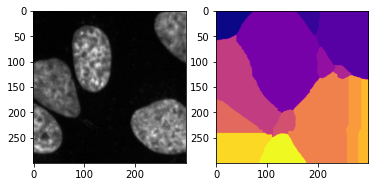

In [5]:
image = plt.imread('../images/dna-images/gnf/dna-1.png')[200:500, 200:500 ,0]   
Omega,S = generate_fragments(image,16,0.01,20,2,100)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image, cmap = 'gray')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(Omega,cmap='plasma')

In [6]:
Z = list(S)
ListOfCoords = create_images(Omega, Z)
len(Z)

24

In [9]:
theta, f = optimise_regions(image, ListOfCoords)

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-3)]: Done  13 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-3)]: Done  16 out of  24 | elapsed:   10.1s remaining:    5.0s
[Parallel(n_jobs=-3)]: Done  19 out of  24 | elapsed:   11.2s remaining:    2.9s
[Parallel(n_jobs=-3)]: Done  22 out of  24 | elapsed:   14.3s remaining:    1.2s
[Parallel(n_jobs=-3)]: Done  24 out of  24 | elapsed:   16.0s finished


In [10]:
seg = multi_segmentation(image, Omega, list(S), theta, f, np.median(f))

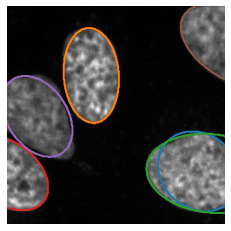

In [11]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for ellipse in seg:
    for contour in ellipse:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.axis('off')
plt.savefig('../images/segmented/dna-3.jpg', bbox_inches = 'tight')

In [ ]:
for i in tqdm(range(2,50)):
    image = plt.imread('../images/dna-images/gnf/dna-' + str(i) + '.png')[...,0]
    Omega,S = generate_fragments(image,16,0.01,20,2,100)
    Z = list(S)
    ListOfCoords = create_images(Omega, Z)
    theta, f = optimise_fragments(image, ListOfCoords)
    seg = multi_segmentation(image, Omega, list(S), f, np.median(f), theta)
    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)
    for ellipse in seg:
        for contour in ellipse:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    plt.axis('off')
    plt.savefig('../images/segmented/dna-' + str(i) + '.png', bbox_inches = 'tight')